## Лабораторная работа 4: «Построение линии регрессии по данным пористости и проницаемости»

##### Задачи
1. Построить поле наблюдений (как в первой лр), по этим данным вычислить линию регрессии проницаемости ПО пористости (не наоборот).
2. Посчитать коэффициент линейной регрессии.
3. Посчитать отклонение от линии регрессии и сравнить полученные результаты с нормальной плотностью.

In [54]:
import numpy as np
import statistics
from scipy import stats
import matplotlib.pyplot as plt

In [55]:
Pron = [83.8903, 108.1415, 163.6959, 100.1789, 75.4938, 29.2414, 33.3903,
     34.0944, 16.6437, 25.7459, 147.2564, 145.0315, 140.6969, 232.7385,
     168.9838, 200.3236, 178.0021, 31.5438, 14.2295, 16.9853]

Por = [0.2636, 0.2588, 0.2694, 0.2663, 0.2581, 0.2533, 0.2413, 0.2382,
       0.1837, 0.1609, 0.1775, 0.1806, 0.1734, 0.1785, 0.1827, 0.1793,
       0.1744, 0.1292, 0.1306, 0.1355]
no_sort_pron= Pron
no_sort_por = Por
Pron = np.array(Pron)
Por = np.array(Por)
print()
print(Pron)
print()
print(Por)


[ 83.8903 108.1415 163.6959 100.1789  75.4938  29.2414  33.3903  34.0944
  16.6437  25.7459 147.2564 145.0315 140.6969 232.7385 168.9838 200.3236
 178.0021  31.5438  14.2295  16.9853]

[0.2636 0.2588 0.2694 0.2663 0.2581 0.2533 0.2413 0.2382 0.1837 0.1609
 0.1775 0.1806 0.1734 0.1785 0.1827 0.1793 0.1744 0.1292 0.1306 0.1355]


In [56]:
N_v  = Pron.size # длинна выборки
Ex_Pron = np.mean(Pron) # мат ожидание проницаемости
Ex_Por = np.mean(Por) # мат ожидание пористости

print('Размер выборки - ',N_v)
print('Матиматическое ожидание проницаемости', Ex_Pron) # выборочная средняя
print('Матиматическое ожидание пористости',Ex_Por) # выборочная средняя

Размер выборки -  20
Матиматическое ожидание проницаемости 97.31537499999999
Матиматическое ожидание пористости 0.20176499999999997


In [57]:
SVar_Pron = np.var(Pron) # дисперсия проницаемости
SVar_Por = np.var(Por) # дисперсия пористости
Std_Pron = np.std(Pron, ddof = 1)# Среднеквадратичное отклонение проницаемости
Std_Por = np.std(Por, ddof = 1)# Среднеквадратичное отклонение пористости


print('Дисперсия проницаемости - {0}, Среднеквадратическое отклонение - {1}'.format(SVar_Pron,Std_Pron))
print('Дисперсия пористости - {0}, Среднеквадратическое отклонение - {1}'.format(SVar_Por,Std_Por))


Дисперсия проницаемости - 4723.373867927875, Среднеквадратическое отклонение - 70.51221520102499
Дисперсия пористости - 0.0022626442749999996, Среднеквадратическое отклонение - 0.04880297957901211


## Пострим поле наблюдений

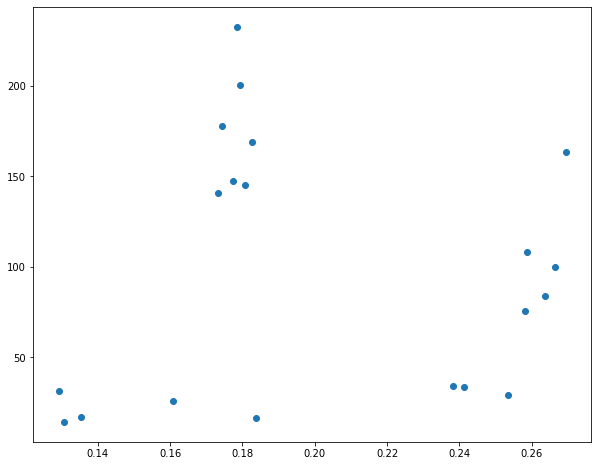

In [58]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(no_sort_por,no_sort_pron)
plt.show()

### Определим уравнение линейной регрессии

In [59]:
koeff = np.polyfit(Por, Pron, 1) # метод наименьших квадратов, аппроксимаци ( полином первой степени)
p = np.poly1d(koeff)
print('Уравнение линейной регрессии  y =',p)


Уравнение линейной регрессии  y =  
61.72 x + 84.86


### Визуализируем линию регрессии и поле наблюдений

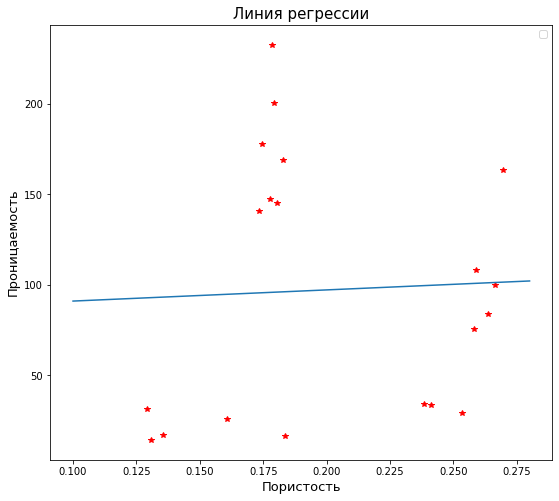

In [68]:
fig, ax = plt.subplots(figsize = (9,8))
xp = np.linspace(0.1, 0.28, 100)
ax.set_title('Линия регрессии',fontsize = 15)
plt.legend(['Поле наблюдений','Линия регрессии'])
plt.ylabel('Проницаемость', fontsize= 13)
plt.xlabel('Пористость',fontsize =13)
ax.plot(Por, Pron, 'r*', xp, p(xp))
plt.show()

### Построим отклонения от линии регрессии

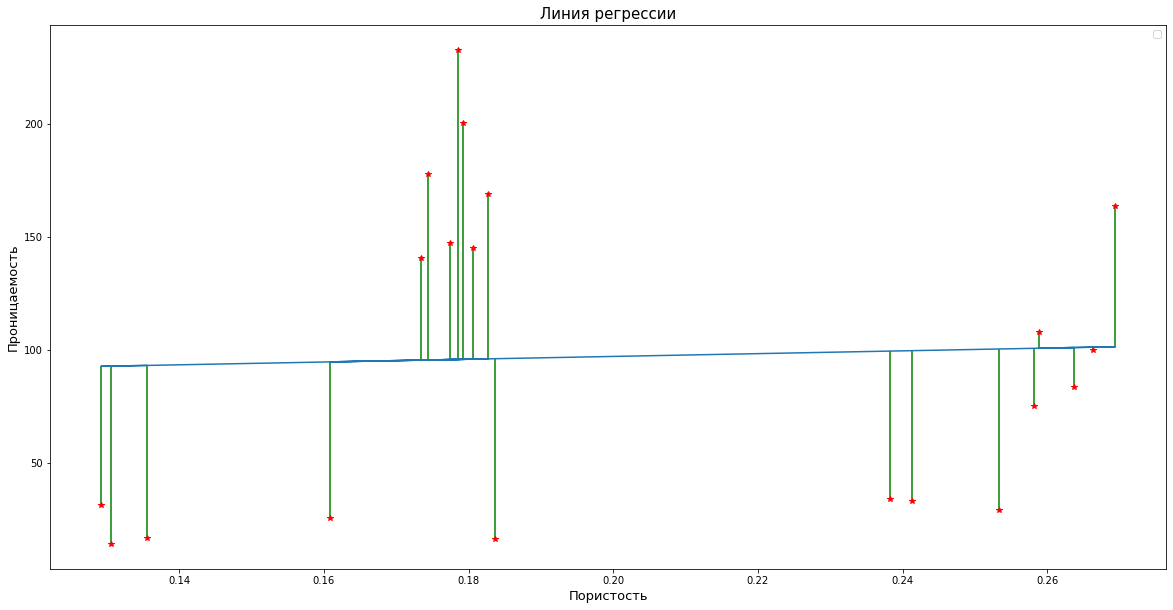

Отклонения [-17.241307445961638, 7.306131184920801, 62.20633754172208, -1.119341675833013, -25.298367348075516, -71.25452871719307, -66.36503213998694, -65.46961135754202, -79.55676856939763, -69.04743507270601, 51.43857299549222, 49.022352213047284, 45.13211015937095, 136.85895661405834, 72.84504781203623, 104.39468350891129, 82.37559377793713, -61.29312578125321, -78.6938287152606, -76.24043898428641]


In [69]:
otcl = []
fig, ax = plt.subplots(figsize = (20,10))

xp = Por# иксы у прямой
yy = p(xp)# игреки у прямой

ax.set_title('Линия регрессии',fontsize = 15)
plt.legend(['Поле наблюдений','Линия регрессии'])
plt.ylabel('Проницаемость', fontsize= 13)
plt.xlabel('Пористость',fontsize =13)
ax.plot(Por, Pron, 'r*', xp, p(xp))


for i in range(20):
    temp = []
    temp = [yy[i], Pron[i]]
    otcl.append(Pron[i] - yy[i])
    ax.vlines(Por[i], min(temp), max(temp),color = 'g')

plt.show()

print('Отклонения',otcl)

#### Мат ожидание, дисперсия, ср откл, отклонений. для отклонений

In [78]:
otcl.sort()# вариационный ряд
Ex = np.mean(otcl) # мат ожидание проницаемости
print(otcl)
print('Матиматическое ожидание =',Ex) # выборочная средняя

[-79.55676856939763, -78.6938287152606, -76.24043898428641, -71.25452871719307, -69.04743507270601, -66.36503213998694, -65.46961135754202, -61.29312578125321, -25.298367348075516, -17.241307445961638, -1.119341675833013, 7.306131184920801, 45.13211015937095, 49.022352213047284, 51.43857299549222, 62.20633754172208, 72.84504781203623, 82.37559377793713, 104.39468350891129, 136.85895661405834]
Матиматическое ожидание = 1.4210854715202004e-14


In [73]:
Var = np.var(otcl) # дисперсия проницаемости
Std = np.std(otcl, ddof = 1)# Среднеквадратичное отклонение проницаемости

print('Дисперсия  - {0}, Среднеквадратическое отклонение - {1}'.format(Var,Std))



Дисперсия  - 4714.755655591521, Среднеквадратическое отклонение - 70.44785795250512


## Критерий Колмогорова

#### Построим ЭФР

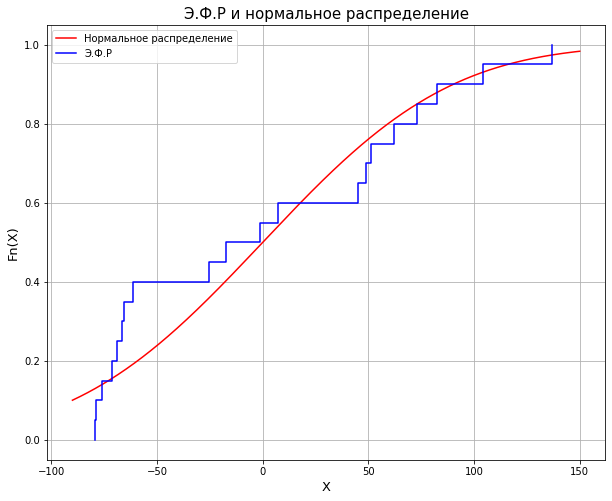

In [83]:
from statsmodels.distributions.empirical_distribution import ECDF

fig, ax = plt.subplots(figsize = (10,8))
mu , sigma = Ex, Std # мат ожидание и дисперсия
rv_normal = stats.norm(loc= mu, scale = sigma)
x = np.linspace(-90,150,1000)
cdf = rv_normal.cdf(x) # нормальная функция распределения
ax.plot(x,cdf,'r')
ecdf = ECDF(otcl)
ax.step(ecdf.x,ecdf.y, where = 'post', c ='b')
ax.grid()
ax.set_title('Э.Ф.Р и нормальное распределение',fontsize = 15)
plt.legend(['Нормальное распределение','Э.Ф.Р'])
plt.ylabel('Fn(X)', fontsize= 13)
plt.xlabel('X',fontsize =13)

plt.show()

####  Построим гистограмму

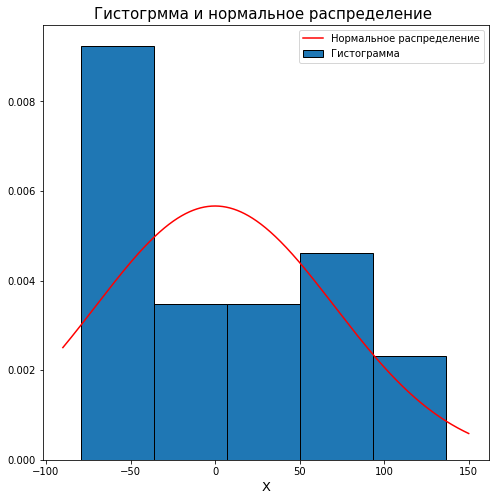

In [86]:
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(otcl, bins = 5, density = True,edgecolor = 'k')
mu, sigma = Ex, Std
rv_normal = stats.norm(loc= mu, scale = sigma)
x = np.linspace(-90,150,1000)
pdf = rv_normal.pdf(x)
ax.plot(x,pdf,'r')
ax.set_title('Гистогрмма и нормальное распределение ',fontsize = 15)
plt.legend(['Нормальное распределение','Гистограмма'])
plt.xlabel('X',fontsize =13)
plt.show()


### Подсчитаем критерий Колмогорова

In [87]:
#from scipy.stats import kstwo #распределение колмагорова
import math as m
mu , sigma = Ex, Std # мат ожидание и дисперсия
rv_normal = stats.norm(loc= mu, scale = sigma)
n = 20
Dn= []
R = []
for i in range(n):
    R.append(m.fabs(ecdf(otcl[i]) - rv_normal.cdf(otcl[i])))
    Dn.append(max([m.fabs((i/n) - rv_normal.cdf(otcl[i])), m.fabs(rv_normal.cdf(otcl[i])-((i-1)/n)) ]))

print("1 формула", max(R)) 
print("2 формула", max(Dn))
p1 = 0.90
p2 = 0.95
print('Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.90', stats.ksone.ppf(p1,20))
print('Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.95', stats.ksone.ppf(p2,20))


1 формула 0.20786333171230814
2 формула 0.18912351683025896
Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.90 0.23155534940864161
Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.95 0.2647335873372445


## Критерий Пирсона

In [91]:
# Разделим выборку на 5 равных интервалов
X = np.linspace(min(otcl), max(otcl), 6)
N = []
for n in range(5):
    k = 0
    if n!=6:
        for i in otcl:
            if X[n] <= i<= X[n+1]:
                k+=1;
    N.append(k)
print(X)
# Количество элементов в интервале
print('n1 = {0} n2 = {1} n3 = {2} n4 = {3} n5 ={4}   '.format(N[0], N[1],N[2],N[3], N[4]))

[-79.55676857 -36.27362353   7.0095215   50.29266654  93.57581158
 136.85895661]
n1 = 8 n2 = 3 n3 = 3 n4 = 4 n5 =2   


In [92]:
mu, sigma = Ex, Std
rv_normal = stats.norm(loc= mu, scale = sigma)
p1 = 0.90
p2 = 0.95
n = 20
SumX = 0 # будем хранить статистику пирсона
p=[]
p.append(rv_normal.cdf(X[1]) - rv_normal.cdf(-float('inf')))
for i in range(1,4):
    k = (rv_normal.cdf(X[i+1]) - rv_normal.cdf(X[i]))
    p.append(k)
p.append(rv_normal.cdf(float('inf')) - rv_normal.cdf(X[4]))
print('Вероятность поподания н.р. с.в. в интервалы\n',p)
print('Сумма вероятностьей = ', sum(p))
n = 20
for i in range(5):
    SumX += ((N[i]-n*p[i])**2)/(n*p[i])
print('Статистика Пирсона = ',SumX)

from scipy.stats import chi2
chi21 = chi2.ppf(p1, 5-1-2)
chi22 = chi2.ppf(p2, 5-1-2)
print('Квантиль хи - квадрат распределения с доверительной вероятностью 0.90 =',chi21)
print('Квантиль хи - квадрат распределения с доверительной вероятностью 0.95 =',chi22)

    
    

Вероятность поподания н.р. с.в. в интервалы
 [0.30331134393881554, 0.23631778467001174, 0.22272610265162363, 0.14560507572127968, 0.09203969301826942]
Сумма вероятностьей =  1.0
Статистика Пирсона =  2.1421391680127693
Квантиль хи - квадрат распределения с доверительной вероятностью 0.90 = 4.605170185988092
Квантиль хи - квадрат распределения с доверительной вероятностью 0.95 = 5.991464547107979
